In [29]:
!pip install statsmodels
!pip install pmdarima

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv('/content/drive/MyDrive/CSV_data/Kalimati_prices.csv')
df

,Commodity,Date,Unit,Minimum,Maximum,Average
0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.50
1,Pomegranate,2013-06-16,Kg,200.0,220.0,210.00
2,Lime,2013-06-16,Kg,200.0,400.0,300.00
3,Banana,2013-06-16,Doz,70.0,80.0,75.00
4,Apple(Jholey),2013-06-16,Kg,100.0,120.0,110.00
...,...,...,...,...,...,...
293635,Christophine,2023-09-28,Kg,10.0,15.0,12.50
293636,Chilli Green(Machhe),2023-09-28,Kg,70.0,80.0,76.67
293637,Chilli Green(Bullet),2023-09-28,Kg,110.0,120.0,115.00
293638,Fish Fresh(Bachuwa),2023-09-28,Kg,270.0,300.0,285.00


In [32]:
df['Commodity'].value_counts()

,count
Commodity,
Cauli Local,3741
Ginger,3741
Chilli Dry,3738
Banana,3733
Coriander Green,3732
...,...
Tree Tomato,109
Water Melon(Dotted),64
Maize,24


In [33]:
ginger_df = df[df['Commodity'] == 'Ginger']
ginger_df

,Commodity,Date,Unit,Minimum,Maximum,Average
30,Ginger,2013-06-16,Kg,140.0,150.0,145.0
103,Ginger,2013-06-17,Kg,140.0,150.0,145.0
176,Ginger,2013-06-18,Kg,140.0,150.0,145.0
248,Ginger,2013-06-19,Kg,140.0,150.0,145.0
322,Ginger,2013-06-20,Kg,140.0,150.0,145.0
...,...,...,...,...,...,...
293242,Ginger,2023-09-24,Kg,160.0,180.0,170.0
293338,Ginger,2023-09-25,Kg,170.0,180.0,175.0
293432,Ginger,2023-09-26,Kg,160.0,180.0,170.0
293527,Ginger,2023-09-27,Kg,160.0,180.0,167.5


In [38]:
ginger_df['Date'] = pd.to_datetime(ginger_df['Date'])

In [39]:
ginger_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3741 entries, 30 to 293619
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Commodity  3741 non-null   object        
 1   Date       3741 non-null   datetime64[ns]
 2   Unit       3741 non-null   object        
 3   Minimum    3741 non-null   float64       
 4   Maximum    3741 non-null   float64       
 5   Average    3741 non-null   float64       
 6   Lag_1      3740 non-null   float64       
 7   Lag_2      3734 non-null   float64       
 8   Lag_3      3711 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 421.3+ KB


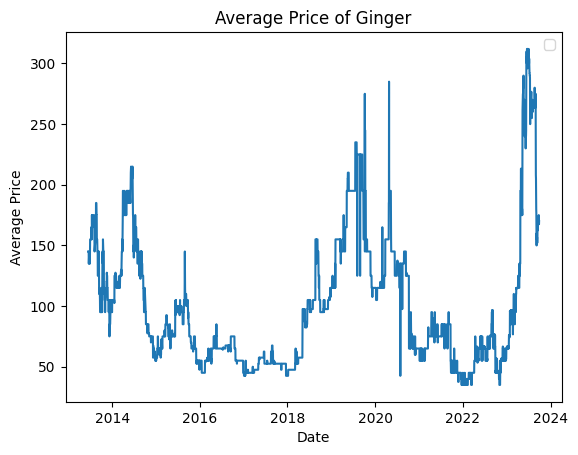

In [40]:
plt.plot(ginger_df['Date'], ginger_df['Average'])
plt.title('Average Price of Ginger')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.show()

In [41]:
ginger_df['Lag_1'] = ginger_df['Average'].shift(1)
ginger_df['Lag_2'] = ginger_df['Average'].shift(7)
ginger_df['Lag_3'] = ginger_df['Average'].shift(30)
ginger_df

,Commodity,Date,Unit,Minimum,Maximum,Average,Lag_1,Lag_2,Lag_3
30,Ginger,2013-06-16,Kg,140.0,150.0,145.0,NaN,NaN,NaN
103,Ginger,2013-06-17,Kg,140.0,150.0,145.0,145.0,NaN,NaN
176,Ginger,2013-06-18,Kg,140.0,150.0,145.0,145.0,NaN,NaN
248,Ginger,2013-06-19,Kg,140.0,150.0,145.0,145.0,NaN,NaN
322,Ginger,2013-06-20,Kg,140.0,150.0,145.0,145.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
293242,Ginger,2023-09-24,Kg,160.0,180.0,170.0,170.0,170.0,264.00
293338,Ginger,2023-09-25,Kg,170.0,180.0,175.0,170.0,162.5,265.00
293432,Ginger,2023-09-26,Kg,160.0,180.0,170.0,175.0,170.0,263.33
293527,Ginger,2023-09-27,Kg,160.0,180.0,167.5,170.0,170.0,265.00


In [43]:
ginger_df.dropna(inplace=True)
ginger_df

,Commodity,Date,Unit,Minimum,Maximum,Average,Lag_1,Lag_2,Lag_3
2152,Ginger,2013-07-25,Kg,170.0,180.0,175.0,175.0,175.0,145.00
2211,Ginger,2013-07-26,Kg,170.0,180.0,175.0,175.0,165.0,145.00
2291,Ginger,2013-07-28,Kg,170.0,180.0,175.0,175.0,165.0,145.00
2361,Ginger,2013-07-29,Kg,170.0,180.0,175.0,175.0,175.0,145.00
2428,Ginger,2013-07-30,Kg,170.0,180.0,175.0,175.0,175.0,145.00
...,...,...,...,...,...,...,...,...,...
293242,Ginger,2023-09-24,Kg,160.0,180.0,170.0,170.0,170.0,264.00
293338,Ginger,2023-09-25,Kg,170.0,180.0,175.0,170.0,162.5,265.00
293432,Ginger,2023-09-26,Kg,160.0,180.0,170.0,175.0,170.0,263.33
293527,Ginger,2023-09-27,Kg,160.0,180.0,167.5,170.0,170.0,265.00


In [44]:
features = ['Lag_1', 'Lag_2', 'Lag_3']
X = ginger_df[features]
y = ginger_df['Average']

In [55]:
len(X)

3711

In [56]:
XX_train = X.iloc[:3000]
XX_test = X.iloc[3000:]
yy_train = y.iloc[:3000]
yy_test = y.iloc[3000:]

In [45]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(XX_train, yy_train)

LinearRegression()

In [60]:
pred = model.predict(XX_test)
pred

array([ 46.02922442,  46.02922442,  46.02922442,  46.02922442,
        46.02922442,  47.32680299,  46.02922442,  46.02922442,
        46.02922442,  62.42463396,  62.42463396,  53.89415775,
        53.81096488,  53.81096488,  53.81096488,  56.40612203,
        56.57250775,  46.74445296,  46.82764583,  46.82764583,
        46.82764583,  46.82764583,  46.82764583,  45.36368153,
        45.36368153,  45.36368153,  45.36368153,  45.36368153,
        45.53006725,  45.36368153,  45.36368153,  49.58732321,
        45.36368153,  45.36368153,  53.81096488,  45.36368153,
        45.36368153,  46.01247082,  45.69645298,  45.69645298,
        46.82764583,  45.53006725,  45.53006725,  39.19460474,
        39.19460474,  39.19460474,  39.02821902,  45.36368153,
        45.36368153,  44.3904976 ,  44.3904976 ,  44.3904976 ,
        44.3904976 ,  45.36368153,  45.36368153,  45.36368153,
        45.36368153,  45.36368153,  45.36368153,  45.36368153,
        45.44687439,  45.36368153,  45.36368153,  45.53

In [63]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
rmse = sqrt(mean_squared_error(yy_test, pred))
rmse

r2_score(yy_test, pred)


0.9914714329014549

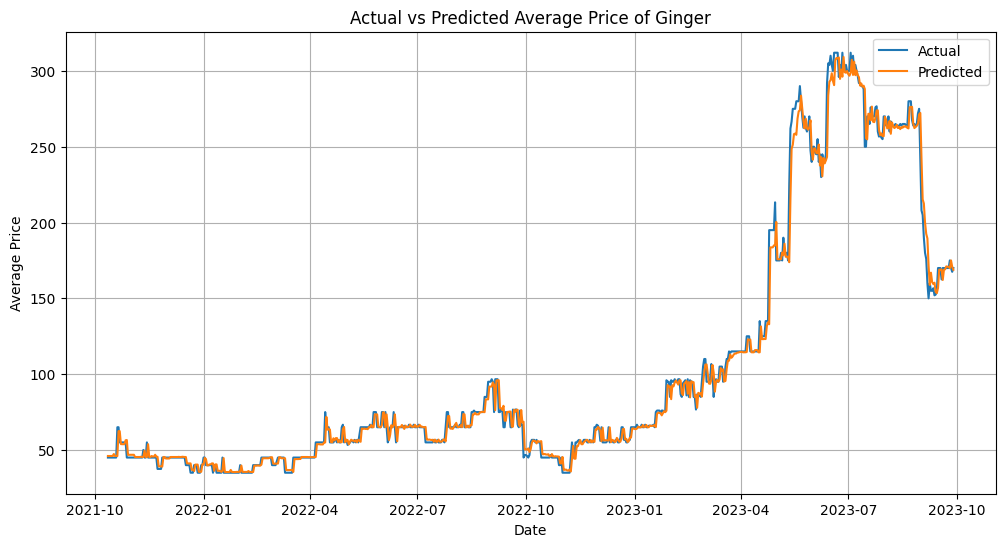

In [65]:
plt.figure(figsize=(12, 6))
plt.plot(ginger_df['Date'].iloc[-len(yy_test):], yy_test, label='Actual')
plt.plot(ginger_df['Date'].iloc[-len(yy_test):], pred, label='Predicted')
plt.title('Actual vs Predicted Average Price of Ginger')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()